In [2]:
# Imports

import tensorflow as tf
from tensorflow.keras import layers, models 
from tensorflow.keras.preprocessing.image import ImageDataGenerator 


# Plot confusion matrix
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import numpy as np

import matplotlib.pyplot as plt

In [13]:
# Import Images 

IMG_SIZE = 254
BATCH_SIZE = 32

train_path = "covid_normal_split/train"
val_path = "covid_normal_split/val"
test_path = "covid_normal_split/test"

img_rescale = ImageDataGenerator(rescale=1./255)

train_data_augmentation = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True

)

train_gen = train_data_augmentation.flow_from_directory(
    train_path,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

val_gen = img_rescale.flow_from_directory(
    val_path,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

test_gen = img_rescale.flow_from_directory(
    test_path,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='binary'
)



Found 9665 images belonging to 2 classes.
Found 2071 images belonging to 2 classes.
Found 2072 images belonging to 2 classes.


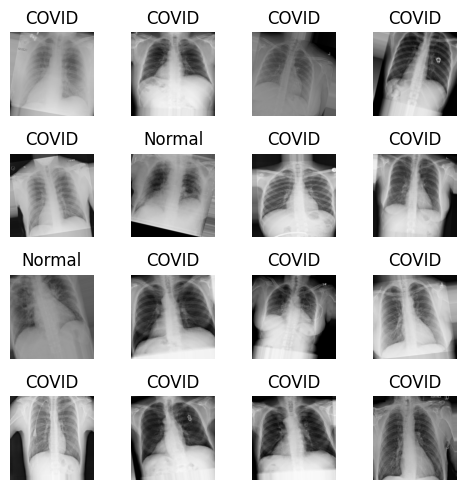

In [20]:
#visualize data

images, labels = next(train_gen)
plt.figure(figsize=(5,5))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.imshow(images[i])
    plt.title("COVID" if labels[i]==1 else "Normal")
    plt.axis('off')

plt.tight_layout()
plt.show()

In [4]:
model = models.Sequential()

# Input layer
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)))
model.add(layers.MaxPooling2D((2, 2)))

# Hidden layer 1
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Hidden layer 2
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Output layer
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

# Compile Model
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.summary()


/Users/manahilnaveed/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 252, 252, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 126, 126, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 124, 124, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │     7,372,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,466,177 (28.48 MB)

 Trainable params: 7,466,177 (28.48 MB)

 Non-trainable params: 0 (0.00 B)

In [5]:
# Train the model
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=10
)




Epoch 1/10
303/303 ━━━━━━━━━━━━━━━━━━━━ 236s 774ms/step - accuracy: 0.7354 - loss: 0.5705 - val_accuracy: 0.7383 - val_loss: 0.4608
Epoch 2/10
303/303 ━━━━━━━━━━━━━━━━━━━━ 202s 665ms/step - accuracy: 0.7472 - loss: 0.4817 - val_accuracy: 0.7504 - val_loss: 0.4237
Epoch 3/10
303/303 ━━━━━━━━━━━━━━━━━━━━ 216s 711ms/step - accuracy: 0.7830 - loss: 0.4390 - val_accuracy: 0.8112 - val_loss: 0.3938
Epoch 4/10
303/303 ━━━━━━━━━━━━━━━━━━━━ 188s 621ms/step - accuracy: 0.8023 - loss: 0.4178 - val_accuracy: 0.8213 - val_loss: 0.3430
Epoch 5/10
303/303 ━━━━━━━━━━━━━━━━━━━━ 177s 584ms/step - accuracy: 0.8276 - loss: 0.3823 - val_accuracy: 0.8899 - val_loss: 0.2984
Epoch 6/10
303/303 ━━━━━━━━━━━━━━━━━━━━ 176s 579ms/step - accuracy: 0.8365 - loss: 0.3571 - val_accuracy: 0.8836 - val_loss: 0.2680
Epoch 7/10
303/303 ━━━━━━━━━━━━━━━━━━━━ 173s 570ms/step - accuracy: 0.8547 - loss: 0.3322 - val_accuracy: 0.8812 - val_loss: 0.2649
Epoch 8/10
303/303 ━━━━━━━━━━━━━━━━━━━━ 174s 574ms/step - accuracy: 0.8498 -

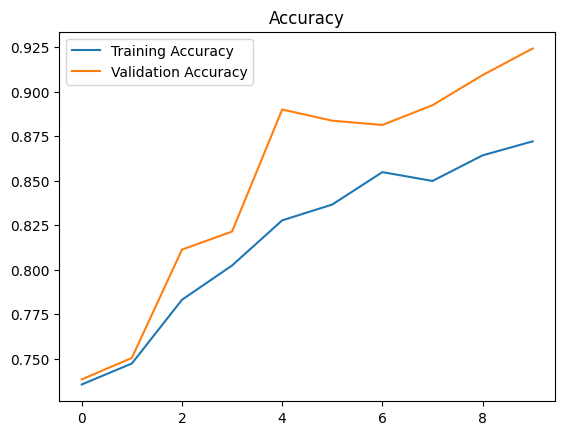

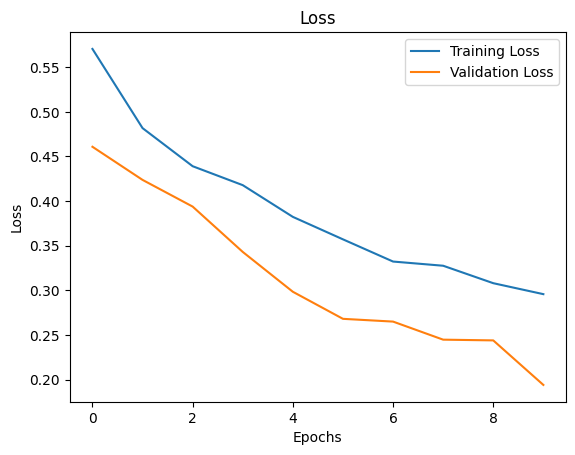

In [15]:
# Visualize performance 

import matplotlib.pyplot as plt

# Accuracy Plot
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(), plt.title('Accuracy'), plt.show()
plt.xlabel('Epochs'), plt.ylabel('Accuracy')
# Loss Plot
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(), plt.title('Loss')
plt.xlabel('Epochs'), plt.ylabel('Loss')
plt.show()

In [20]:
import keras
keras.config.disable_traceback_filtering()


In [15]:
print("Train samples:", train_gen.samples)
print("Validation samples:", val_gen.samples)
print("Classes:", train_gen.class_indices)


Train samples: 9665
Validation samples: 2071
Classes: {'COVID': 0, 'Normal': 1}


65/65 ━━━━━━━━━━━━━━━━━━━━ 11s 170ms/step


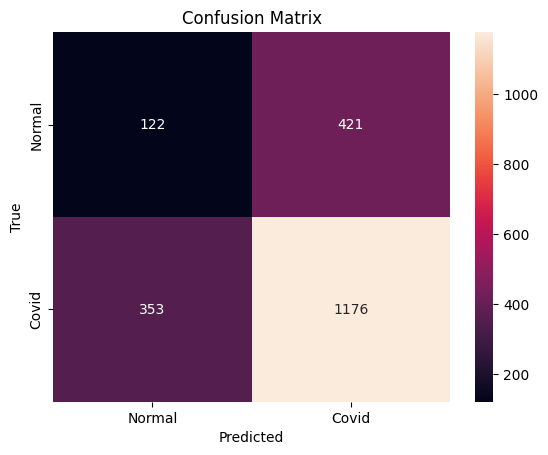

Classification Report:
              precision    recall  f1-score   support

      Normal       0.26      0.22      0.24       543
       Covid       0.74      0.77      0.75      1529

    accuracy                           0.63      2072
   macro avg       0.50      0.50      0.50      2072
weighted avg       0.61      0.63      0.62      2072



In [7]:
#plot confusion matrix
y_true = test_gen.classes
y_pred_prob = model.predict(test_gen)
y_pred = (y_pred_prob > 0.5).astype(int)

cm = confusion_mtx = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt='d', xticklabels=['Normal', 'Covid'], yticklabels=['Normal', 'Covid'])
plt.xlabel('Predicted')
plt.ylabel('True') 
plt.title('Confusion Matrix')
plt.show()

print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=['Normal', 'Covid']))
